In [178]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder, 
    StandardScaler
)

from sklearn.dummy import DummyClassifier

## Predicting Breast Cancer Diagnosis Using Cell Nuclei Morphology

This project will focus on building and assessing a machine-learning model that can determine the diagnosis (Malignant or Benign) based on the characteristics of cell nuclei. The dataset was obtained from the Diagnostic Wisconsin Breast Cancer Database and downloaded through Kaggle. The cell nuclei were observed using fine needle aspirate (FNA) of breast mass. 

The dataset includes features for radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry and fractal dimension. For each feature, the mean, standard error and worst/largest value were documented in separate columns. Malignant cell nuclei typically exhibit larger size and irregular shape, changes can also occur to the surface, volume, density, structure and homogeneity ([Link](https://www.ncbi.nlm.nih.gov/books/NBK9553/)). Previous findings have linked the identification of cell morphology to risk of metastasis and tumorigenicity ([Link](https://breast-cancer-research.biomedcentral.com/articles/10.1186/s13058-024-01796-8)) which facilitates widespread cancerous invasions to other organs such as bones, lungs, liver and brain ([Link](https://www.sciencedirect.com/science/article/pii/S1044579X1930063X#sec0010)).

This model will be trained on cell nuclei morphology to diagnose infections as malignant or benign using classification-supervised machine learning. It can be used as a tool to efficiently classify samples. It will also highlight the most important features that contribute to the diagnosis, thereby enhancing the interpretability of the output. 



In [179]:
breast_cancer = pd.read_csv("data/breast-cancer-wisconsin.csv")
breast_cancer.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


Malignant Cases: 212, 37.26 %
Benign Cases: 357, 62.74 %


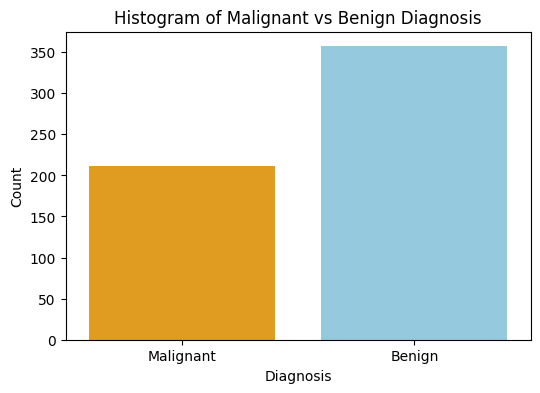

In [180]:
malignant_count = len(breast_cancer[breast_cancer["diagnosis"] == "M"])
benign_count = len(breast_cancer[breast_cancer["diagnosis"] == "B"])
print(f"Malignant Cases: {malignant_count}, {malignant_count/len(breast_cancer)*100:.2f} %")
print(f"Benign Cases: {benign_count}, {benign_count/len(breast_cancer)*100:.2f} %")

plt.figure(figsize=(6,4))
sns.countplot(x = 'diagnosis', 
              data=breast_cancer, 
              
              hue='diagnosis', 
              palette={'M': 'orange', 'B': 'skyblue'})
plt.title("Histogram of Malignant vs Benign Diagnosis")
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(ticks = ['M', 'B'], labels=['Malignant', 'Benign'])
plt.show()

### Intial Observations of the Dataset: 
- There are no missing values, imputation is not required.
- There may be highly correlated features in the dataset due to each observation containing the mean, standard error and worst value. This could potentially cause issues due to redundancy and multicolinearity (for linear models).
- There are more examples with benign diagnosis than malignant, but the difference is not extreme. 
- There is an extra column (feature #32) that does not contain any data, requires removal.
- All features of integer/float data types


### Exploratory Data Analysis (EDA)

Remove the **ID** and **Unnamed: 32** columns from the dataset, and switch the diagnosis into binary to make downstream analysis easier. 
<br>Split the data into train (70%) and test (30%) sets.

In [181]:
breast_cancer = breast_cancer.drop(columns = ["id", "Unnamed: 32"])
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map({'M': 1, 'B': 0})

train, test = train_test_split(breast_cancer, train_size = 0.7, random_state=123)

The dataset contains three perspectives for each feature (**mean, standard error and worst**). The PCA plot below compares a dataset with the mean features to the dataset containing all the features/perspectives. The dataset containing mean features reaches 100% cumalative variance with approximately 7 principal components, while the full dataset requires approximately 23 principal compoents to reach the same variance. This suggests that the additional perspectives are adding variance/dimensionality to the data, but it is not clear whether this will contribute to signal or noise. Since all the variance can be explained with less compoenents for the mean dataset, this data contains the core structure of the data and will exhibit less dimensionality as well as less risk to overfitting. 

To determine whether the variance contributes to signal or noise, the models will we tested with the mean dataset and the full dataset containing all feature perspectives. However, the rest of the EDA will observe the data for **mean**. 

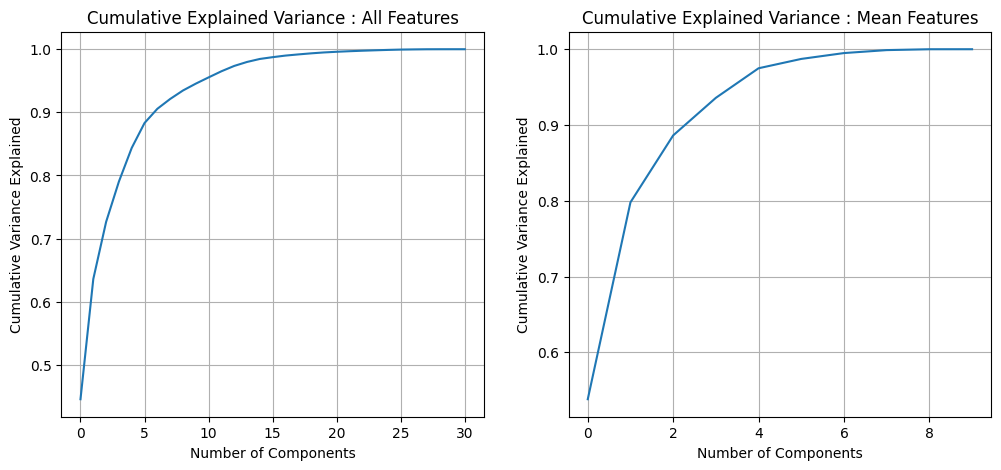

In [182]:
from sklearn.decomposition import PCA

X_scaled = StandardScaler().fit_transform(train)
X_scaled_2 = StandardScaler().fit_transform(train.filter(like="_mean"))

fig, axes = plt.subplots(1,2, figsize=(12,5))

pca = PCA().fit(X_scaled)
pca_2 = PCA().fit(X_scaled_2)

axes[0].plot(pca.explained_variance_ratio_.cumsum())
axes[0].set_title("Cumulative Explained Variance : All Features")
axes[0].set_xlabel("Number of Components")
axes[0].set_ylabel("Cumulative Variance Explained")
axes[0].grid(True)


axes[1].plot(pca_2.explained_variance_ratio_.cumsum())
axes[1].set_title("Cumulative Explained Variance : Mean Features")
axes[1].set_xlabel("Number of Components")
axes[1].set_ylabel("Cumulative Variance Explained")
axes[1].grid(True)

plt.show()

Used the **describe** function to observe summary statistics on the columns showing the mean and worst values. The results indicate there is substantial variation between features, the dataset requires normalization. In particular, the area feature contains min/max values that vary largely outside the 25%-75% (IQR) range. Standard deviation is consistently lower than the mean, suggesting variation is controlled. 

The heatmap indicates that features for the radius, perimeter and area are highly correlated (>0.9), these attributes are too similar and redundant to keep them all. Features for compactness, concavity, and concave points also have high correlation (>0.8), these attributes are also very simular. To avoid the risk of multicolinearity, we will remove perimeter and area and keep radius, this is because radius is the most intuitive and simple. We will also keep concavity. Compactness is related to perimer and area while concave points appears to have some higher correlation to other features.

In [183]:
train.filter(like="_mean").describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,398.0,14.144759,3.496451,7.69100,11.602500,13.515000,16.027500,27.42000
texture_mean,398.0,19.403593,4.458139,10.38000,16.187500,18.900000,21.892500,39.28000
perimeter_mean,398.0,92.078266,24.040299,47.92000,74.385000,87.295000,105.000000,186.90000
area_mean,398.0,655.813065,344.815080,170.40000,412.525000,561.700000,796.650000,2501.00000
smoothness_mean,398.0,0.095989,0.013831,0.05263,0.085977,0.095150,0.104575,0.16340
compactness_mean,398.0,0.104524,0.052519,0.02650,0.066090,0.093020,0.129700,0.34540
concavity_mean,398.0,0.089133,0.080020,0.00000,0.029950,0.062650,0.122400,0.42680
concave points_mean,398.0,0.049081,0.038360,0.00000,0.020715,0.033455,0.073850,0.20120
symmetry_mean,398.0,0.181156,0.028975,0.10600,0.160300,0.178300,0.196000,0.30400
fractal_dimension_mean,398.0,0.062798,0.007392,0.04996,0.057563,0.061400,0.066195,0.09744


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.741760,0.417916,0.753589,0.728190,0.311917,0.561086,0.659802,0.763253,0.311363,...,0.781348,0.460438,0.786728,0.740486,0.382813,0.568410,0.620282,0.784712,0.396055,0.269219
radius_mean,0.741760,1.000000,0.321228,0.997642,0.988027,0.154851,0.472330,0.635485,0.805707,0.147802,...,0.970950,0.311756,0.964931,0.938738,0.109862,0.404352,0.503270,0.738749,0.169952,-0.025435
texture_mean,0.417916,0.321228,1.000000,0.325717,0.323979,-0.060214,0.188772,0.278484,0.274815,0.006971,...,0.352484,0.918553,0.353893,0.347176,0.045281,0.237443,0.272022,0.266370,0.065520,0.068538
perimeter_mean,0.753589,0.997642,0.325717,1.000000,0.987225,0.192891,0.527183,0.678126,0.836756,0.184758,...,0.970909,0.316315,0.970836,0.939638,0.140098,0.449469,0.540973,0.767235,0.196560,0.020919
area_mean,0.728190,0.988027,0.323979,0.987225,1.000000,0.162563,0.472110,0.650498,0.811260,0.157053,...,0.970135,0.309187,0.965156,0.963261,0.117326,0.390984,0.499361,0.725206,0.159702,-0.020937
smoothness_mean,0.311917,0.154851,-0.060214,0.192891,0.162563,1.000000,0.663361,0.515249,0.548292,0.555035,...,0.191609,-0.001881,0.222275,0.189545,0.788360,0.484636,0.413794,0.490553,0.400218,0.495322
compactness_mean,0.561086,0.472330,0.188772,0.527183,0.472110,0.663361,1.000000,0.881399,0.825734,0.608899,...,0.500634,0.202011,0.561120,0.479286,0.550691,0.858430,0.786145,0.795554,0.504289,0.682482
concavity_mean,0.659802,0.635485,0.278484,0.678126,0.650498,0.515249,0.881399,1.000000,0.908753,0.516095,...,0.653125,0.283635,0.697811,0.644986,0.431785,0.764655,0.881115,0.851143,0.424301,0.523603
concave points_mean,0.763253,0.805707,0.274815,0.836756,0.811260,0.548292,0.825734,0.908753,1.000000,0.480018,...,0.813781,0.282891,0.842224,0.794244,0.440988,0.674024,0.734585,0.906049,0.395295,0.358454
symmetry_mean,0.311363,0.147802,0.006971,0.184758,0.157053,0.555035,0.608899,0.516095,0.480018,1.000000,...,0.179808,0.023787,0.215470,0.173947,0.407074,0.461088,0.419535,0.423153,0.713688,0.431712


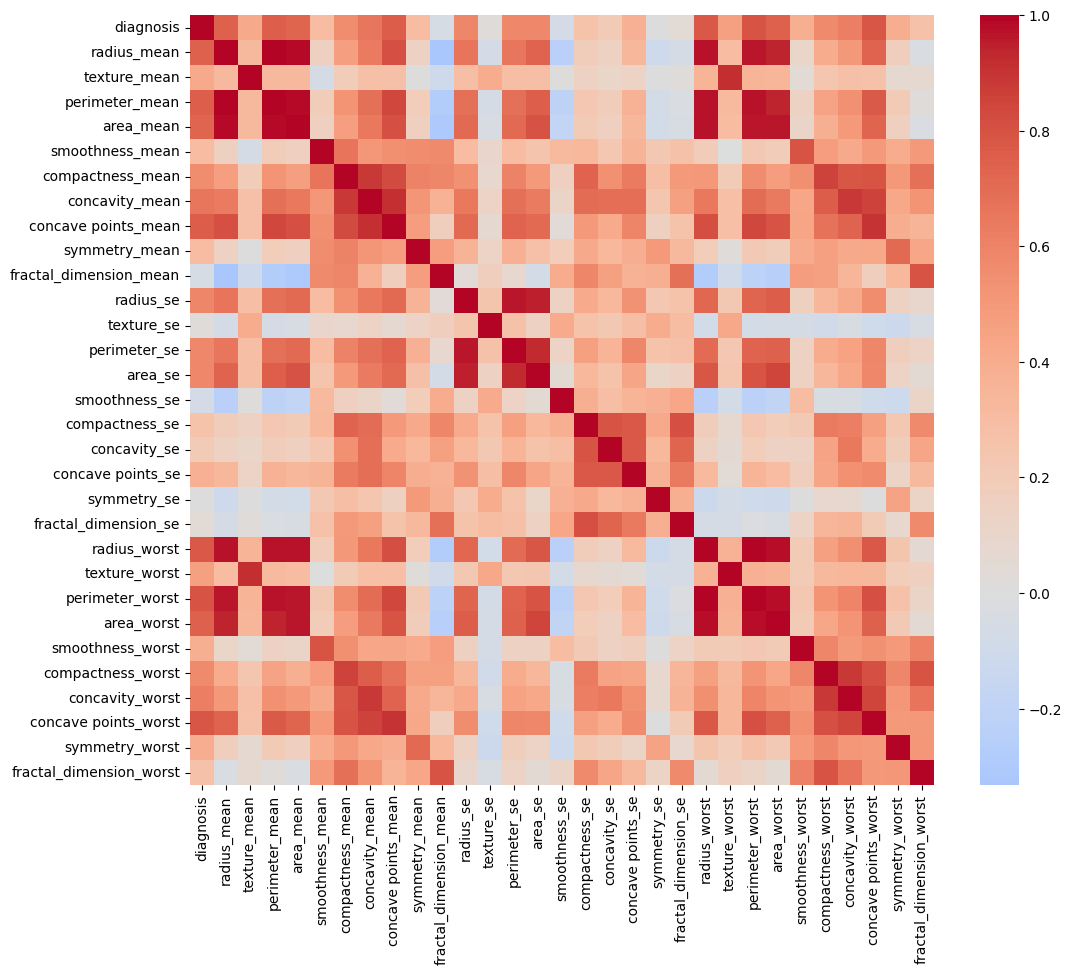

In [184]:
plt.figure(figsize=(12,10))
c = train.corr()
sns.heatmap(c,cmap="coolwarm",center=0)
c

### Feature Engineering

In [185]:
#train["shap_mean"] = train[["radius_mean", "perimeter_mean", "area_mean"]].mean(axis=1)
#train["conc_mean"] = train[["concavity_mean", "concave points_mean"]].mean(axis=1)

#train["shap_se"] = train[["radius_se", "perimeter_se", "area_se"]].mean(axis=1)
#train["conc_se"] = train[["concavity_se", "concave points_se"]].mean(axis=1)

#train["shap_worst"] = train[["radius_worst", "perimeter_worst", "area_worst"]].mean(axis=1)
#train["conc_worst"] = train[["concavity_worst", "concave points_worst"]].mean(axis=1)


In [193]:
cols_to_drop = train.filter(like="perimeter_").columns.tolist()
cols_to_drop += train.filter(like="area_").columns.tolist()
cols_to_drop += train.filter(like="concavity_").columns.tolist()
cols_to_drop += train.filter(like="concave points_").columns.tolist()
#cols_to_drop += train.filter(like="radius_").columns.tolist()
#cols_to_drop += train.filter(like="compactness_").columns.tolist()

train_filtered = train.drop(columns = cols_to_drop)
test_filtered = test.drop(columns = cols_to_drop)

In [168]:
#train_filtered.head()

### Preprocessing and Transformations

In [198]:
X_train = train_filtered.drop(columns=['diagnosis'])
y_train = train_filtered['diagnosis']

X_test = test_filtered.drop(columns=['diagnosis'])
y_test = test_filtered['diagnosis']

In [170]:
results = {}

In [199]:
preprocessor = make_column_transformer(
    (StandardScaler(), X_train.columns)
)

In [200]:
from sklearn.model_selection import cross_validate

dummy_pipe = make_pipeline(preprocessor, DummyClassifier())
score = cross_validate(dummy_pipe, X_train, y_train, scoring="recall", return_train_score=True, cv=10)
results["Dummy Classifier"] = pd.DataFrame(score).mean()

pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Dummy Classifier,0.003498,0.003637,0.0,0.0


In [206]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 559 to 510
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              398 non-null    float64
 1   texture_mean             398 non-null    float64
 2   smoothness_mean          398 non-null    float64
 3   compactness_mean         398 non-null    float64
 4   symmetry_mean            398 non-null    float64
 5   fractal_dimension_mean   398 non-null    float64
 6   radius_se                398 non-null    float64
 7   texture_se               398 non-null    float64
 8   smoothness_se            398 non-null    float64
 9   compactness_se           398 non-null    float64
 10  symmetry_se              398 non-null    float64
 11  fractal_dimension_se     398 non-null    float64
 12  radius_worst             398 non-null    float64
 13  texture_worst            398 non-null    float64
 14  smoothness_worst         398 

In [ ]:
from sklearn.linear_model import LogisticRegression


lr_scores_dict = {
    "C" : [0.001, 0.01, 0.1, 10, 100, 1000, 10000],
    "mean_train_scores" : list(),
    "mean_cv_scores" : list()
}

for C in lr_scores_dict["C"]:
    lr = LogisticRegression(C=C)
    pipe_lr = make_pipeline(preprocessor, lr)
    score = cross_validate(pipe_lr, X_train, y_train, scoring='recall', return_train_score=True, cv=10)
    
    lr_scores_dict["mean_train_scores"].append(score["train_score"].mean())
    lr_scores_dict["mean_cv_scores"].append(score["test_score"].mean())

C:\Users\17788\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [203]:
pd.DataFrame(lr_scores_dict)

,C,mean_train_scores,mean_cv_scores
0,0.001,0.419714,0.415714
1,0.010,0.797818,0.798571
2,0.100,0.923578,0.894762
3,10.000,0.977615,0.916190
4,100.000,0.976076,0.901905
5,1000.000,0.978384,0.902381
6,10000.000,0.979153,0.895238


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


models = {
    "Decision Tree" : DecisionTreeClassifier(random_state = 123), 
    "Random Forest" : RandomForestClassifier(max_depth = 2, random_state=123),
    "LGBM" : SGDClassifier(random_state=123)
    
}

In [208]:
for m in models : 
    new_pipe = make_pipeline(preprocessor, models[m])
    score = cross_validate(new_pipe, X_train, y_train, 
                           scoring = 'recall', 
                           return_train_score=True, 
                           cv=10)
    
    results[f"{models[m]}"] = pd.DataFrame(score).mean()

In [209]:
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Dummy Classifier,0.003498,0.003637,0.000000,0.000000
DecisionTreeClassifier(random_state=123),0.006967,0.003911,0.868095,1.000000
"RandomForestClassifier(max_depth=2, random_state=123)",0.116015,0.007486,0.833810,0.849541
SGDClassifier(random_state=123),0.004249,0.003316,0.902381,0.944460
